<a href="https://colab.research.google.com/github/SKM1978/Deep_Learning_Tutorial/blob/master/Classifying_Cats_vs_Dogs_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, MaxPool2D, Conv2D, GlobalAveragePooling2D, BatchNormalization
from keras.models import Model, load_model

from tensorflow.keras.applications.resnet50 import preprocess_input


# Uploading the dataset

### Steps in uploading the dataset
- Upload in Google Drive
- Mount the Google Drive

In [ ]:
# Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -q keras

In [3]:
# checking if the installation has happened properly

import keras

In [4]:
# Resizing all images

IMAGE_SIZE=[224,224]


# Path to train and test images

train_path='/content/drive/MyDrive/Cats & Dogs - Copy/train'
test_path='/content/drive/MyDrive/Cats & Dogs - Copy/test'

# Transfer Learning with ResNet-50 model

In [5]:
resnet=tf.keras.applications.ResNet50(input_shape=IMAGE_SIZE+[3], include_top=False, weights='imagenet')

# Using resnet model only for feature extraction and not for learning, by freezing all the layers that we don't need
for layer in resnet.layers:
  layer.trainable=False

# Taking the output of the base layers
resnet_output=resnet.output

# Adding our own layers

## Pool Layer
x=GlobalAveragePooling2D()(resnet_output)

## Flatten Layer
x=Flatten()(x)

## Batch Normalization
x=BatchNormalization()(x)

## Fully connected Layer
x=Dense(500, activation='relu')(x)

## Batch Normalization
x=BatchNormalization()(x)

## Dropout Layer
x=Dropout(0.3)(x)

## Batch Normalization
x=BatchNormalization()(x)

## Outer Layer
x=Dense(2, activation='sigmoid')(x)

94781440/94765736 [==============================] - 1s 0us/step


In [6]:
# Initializing the resnet model

rs_model=Model(inputs=resnet.input, outputs=x)

rs_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [7]:
rs_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Image Generator and Augmentation 

In [8]:
# Using the ImageDataGenerator to import images from the dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255.0, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True)
test_datagen=ImageDataGenerator(rescale=1/255.0)

In [9]:
# Make sure you provide the same target size as initialied for the image size

train_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Cats & Dogs - Copy/train', target_size=(224,224), class_mode='categorical', batch_size=32)
test_set=test_datagen.flow_from_directory('/content/drive/MyDrive/Cats & Dogs - Copy/test', target_size=(224,224), class_mode='categorical', batch_size=32)

Found 2002 images belonging to 2 classes.
Found 969 images belonging to 2 classes.


### Fitting the model

In [12]:
result=rs_model.fit_generator(train_set, validation_data=test_set, epochs=100, steps_per_epoch=len(train_set), validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/100
63/63 [==============================] - 39s 617ms/step - loss: 0.6029 - accuracy: 0.6893 - val_loss: 0.5799 - val_accuracy: 0.6791
Epoch 2/100
63/63 [==============================] - 39s 620ms/step - loss: 0.6025 - accuracy: 0.6903 - val_loss: 0.5892 - val_accuracy: 0.6708
Epoch 3/100
63/63 [==============================] - 39s 622ms/step - loss: 0.6162 - accuracy: 0.6723 - val_loss: 0.5774 - val_accuracy: 0.6914
Epoch 4/100
63/63 [==============================] - 39s 619ms/step - loss: 0.5954 - accuracy: 0.6948 - val_loss: 0.5961 - val_accuracy: 0.6739
Epoch 5/100
63/63 [==============================] - 39s 622ms/step - loss: 0.5917 - accuracy: 0.6983 - val_loss: 0.5713 - val_accuracy: 0.6904
Epoch 6/100
63/63 [==============================] - 39s 620ms/step - loss: 0.5976 - accuracy: 0.6888 - val_loss: 0.6092 - val_accuracy: 0.6821
Epoch 7/100
63/63 [==============================] - 39s 622ms/step - loss: 0.5895 - accuracy: 0.6898 - val_loss: 0.6203 - val_accuracy:

### Evaluating the ResNet50 model

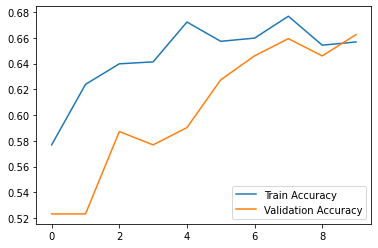

In [11]:
# plot the accuracy
plt.plot(result.history['accuracy'], label='Train Accuracy')
plt.plot(result.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Transfer Learning with VGG Net

In [ ]:
vggnet=tf.keras.applications.VGG19(input_shape=IMAGE_SIZE+[3], include_top=False, weights='imagenet')

# Using vggnet model only for feature extraction and not for learning, by freezing all the layers that we don't need
for layer in vggnet.layers:
  layer.trainable=False

# Taking the output of the base layers
vggnet_output=vggnet.output

# Adding our own layers

## Pool Layer
x=GlobalAveragePooling2D()(vggnet_output)

## Flatten Layer
x=Flatten()(x)

## Batch Normalization
x=BatchNormalization()(x)

## Fully connected Layer
x=Dense(500, activation='relu')(x)

## Batch Normalization
x=BatchNormalization()(x)

## Dropout Layer
x=Dropout(0.3)(x)

## Batch Normalization
x=BatchNormalization()(x)

## Outer Layer
x=Dense(2, activation='sigmoid')(x)

In [ ]:
# Initializing the vggnet model

vgg_model=Model(inputs=vggnet.input, outputs=x)

vgg_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
vgg_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Image Generator and Augmentation

In [9]:
# Using the ImageDataGenerator to import images from the dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_datagen=ImageDataGenerator(rescale=1/255.0, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True)
testing_datagen=ImageDataGenerator(rescale=1/255.0)

In [10]:
# Make sure you provide the same target size as initialied for the image size

training_set=training_datagen.flow_from_directory('/content/drive/MyDrive/Cats & Dogs - Copy/train', target_size=(224,224), class_mode='categorical', batch_size=32)
testing_set=testing_datagen.flow_from_directory('/content/drive/MyDrive/Cats & Dogs - Copy/test', target_size=(224,224), class_mode='categorical', batch_size=32)

Found 2002 images belonging to 2 classes.
Found 969 images belonging to 2 classes.


### Fitting the VGG model

In [ ]:
vgg_result=vgg_model.fit_generator(training_set, validation_data=testing_set, epochs=50, steps_per_epoch=len(train_set), validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/50
63/63 [==============================] - 45s 690ms/step - loss: 0.5174 - accuracy: 0.7672 - val_loss: 0.6085 - val_accuracy: 0.6202
Epoch 2/50
63/63 [==============================] - 43s 680ms/step - loss: 0.4005 - accuracy: 0.8367 - val_loss: 0.5167 - val_accuracy: 0.8679
Epoch 3/50
63/63 [==============================] - 42s 673ms/step - loss: 0.3662 - accuracy: 0.8467 - val_loss: 0.4622 - val_accuracy: 0.8328
Epoch 4/50
63/63 [==============================] - 43s 677ms/step - loss: 0.3316 - accuracy: 0.8601 - val_loss: 0.3959 - val_accuracy: 0.8824
Epoch 5/50
63/63 [==============================] - 42s 677ms/step - loss: 0.3375 - accuracy: 0.8526 - val_loss: 0.3416 - val_accuracy: 0.8710
Epoch 6/50
63/63 [==============================] - 42s 673ms/step - loss: 0.2822 - accuracy: 0.8836 - val_loss: 0.2927 - val_accuracy: 0.8854
Epoch 7/50
63/63 [==============================] - 43s 674ms/step - loss: 0.3059 - accuracy: 0.8626 - val_loss: 0.2705 - val_accuracy: 0.8824

### Evaluating the VGG Net model

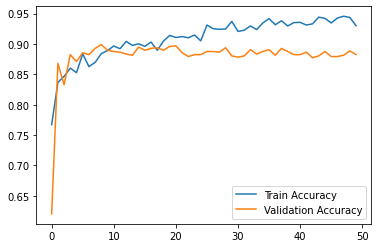

In [ ]:
# plot the accuracy
plt.plot(vgg_result.history['accuracy'], label='Train Accuracy')
plt.plot(vgg_result.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Keras Tuner

Helps in deciding the following hyper parameters
(1) Number of layers
(2) Number of neurons in each layer
(3) Learning rate

In [5]:
!pip install keras-tuner

from tensorflow import keras
from tensorflow.keras import layers

from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

     |████████████████████████████████| 98 kB 3.2 MB/s 


In [6]:
# Building the function to find the best hyper parameters

def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 30)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(2, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [7]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='Cats vs. Dogs classification')

In [11]:
tuner.search(training_set, epochs=5, validation_data=testing_set)
best_model = tuner.get_best_models()[0]


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
num_layers        |14                |?                 
units_0           |160               |?                 
units_1           |128               |?                 
learning_rate     |0.01              |?                 

Epoch 1/5


ValueError: ignored